****Real-Time Wildlife Detection and Alert System for Railway Tracks****

*By: Abhimanyu Saklani(1NT23CS005), Nikhil Shah (1NT23CS148), Samarth Saxena (1NT23CS206)*

**This project aims to prevent wildlife–train collisions by using a real-time object detection system that monitors railway tracks for the presence of animals. Leveraging a custom-trained YOLO model on Roboflow, the system processes live video feeds (e.g., from CCTV or webcams) to detect animals near or on the tracks. When an animal is identified, the system displays a visual alert and can optionally trigger further safety mechanisms such as alarm notifications. The model is optimized for various lighting conditions.**

--------------------------------------------------------------

*Install Required Libraries*

In [1]:
!pip install ultralytics opencv-python pillow ipywidgets matplotlib roboflow pyttsx3 --quiet

In [2]:
!pip install torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cu121 --quiet 

In [1]:
!pip install roboflow --quiet

*Import Required Library*

In [4]:
from ultralytics import YOLO
import cv2
import matplotlib.pyplot as plt
import time
import pyttsx3
from roboflow import Roboflow
from IPython.display import clear_output, display

In [8]:
rf = Roboflow(api_key="PolBl2dEq0yAqoPBBODy")
project = rf.workspace("realtime-wildlife-detection-and-alert-system-for-railway-tracks-animal-dataset").project("animal-detection-9dl1v")
version = project.version(1)
dataset = version.download("yolov8")

loading Roboflow workspace...
loading Roboflow project...


In [3]:
print(dataset.location)

C:\Users\abhi2\Animal-Detection--1


*Load a base YOLOv8 model*

In [10]:
from ultralytics import YOLO
model = YOLO('yolov8n.pt')

 *Train your model using the 'C:\Users\abhi2\Animal-Detection--1\data.yaml' inside dataset folder with 50 Epoches*

In [4]:
model.train(data=r'C:\Users\abhi2\Animal-Detection--1\data.yaml', epochs=50)

New https://pypi.org/project/ultralytics/8.3.143 available  Update with 'pip install -U ultralytics'
Ultralytics 8.3.137  Python-3.10.16 torch-2.5.1+cu121 CUDA:0 (NVIDIA GeForce RTX 3050 Laptop GPU, 4096MiB)
engine\trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=C:\Users\abhi2\Animal-Detection--1\data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=50, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8n.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=train21, nbs

train: Scanning C:\Users\abhi2\Animal-Detection--1\train\labels.cache... 5016 images, 3 backgrounds, 0 corrupt: 100%|██████████| 5016/5016 [00:00<?, ?it/s]


val: Fast image access  (ping: 0.20.0 ms, read: 224.670.7 MB/s, size: 72.9 KB)


val: Scanning C:\Users\abhi2\Animal-Detection--1\valid\labels.cache... 358 images, 0 backgrounds, 0 corrupt: 100%|██████████| 358/358 [00:00<?, ?it/s]


Plotting labels to runs\detect\train21\labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000625, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to runs\detect\train21
Starting training for 50 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/50      2.09G      1.116      3.034      1.576         25        640: 100%|██████████| 314/314 [01:44<00:00,  2.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:05<00:00,  2.01it/s]

                   all        358        498      0.477      0.417       0.44      0.254



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/50      2.05G       1.12       2.16      1.554         22        640: 100%|██████████| 314/314 [01:34<00:00,  3.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:05<00:00,  2.14it/s]


                   all        358        498      0.614      0.495      0.572       0.32

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/50      2.05G       1.14      1.928       1.55         27        640: 100%|██████████| 314/314 [01:32<00:00,  3.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:05<00:00,  2.16it/s]

                   all        358        498      0.773      0.571      0.675      0.415



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/50       2.1G      1.116      1.746      1.538         27        640: 100%|██████████| 314/314 [01:31<00:00,  3.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:05<00:00,  2.16it/s]


                   all        358        498      0.643      0.644       0.66      0.392

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/50      2.05G      1.097      1.618      1.521         19        640: 100%|██████████| 314/314 [01:31<00:00,  3.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:05<00:00,  2.20it/s]


                   all        358        498      0.729       0.63      0.702      0.432

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/50      2.12G      1.056      1.494      1.486         25        640: 100%|██████████| 314/314 [01:31<00:00,  3.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:05<00:00,  2.19it/s]

                   all        358        498      0.711       0.67      0.729      0.477



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/50      2.12G      1.035      1.379      1.464         32        640: 100%|██████████| 314/314 [01:31<00:00,  3.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:05<00:00,  2.18it/s]

                   all        358        498      0.763      0.625      0.723      0.483



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/50      2.05G      1.012      1.323      1.442         27        640: 100%|██████████| 314/314 [01:31<00:00,  3.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:05<00:00,  2.26it/s]

                   all        358        498      0.809      0.696      0.788       0.51



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/50      2.03G     0.9961      1.276      1.432         22        640: 100%|██████████| 314/314 [01:31<00:00,  3.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:05<00:00,  2.23it/s]

                   all        358        498      0.827      0.755      0.828      0.563



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/50      2.03G     0.9781      1.218      1.421         24        640: 100%|██████████| 314/314 [01:31<00:00,  3.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:05<00:00,  2.29it/s]

                   all        358        498      0.816      0.728      0.793      0.542



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/50      2.03G     0.9707      1.174      1.414         24        640: 100%|██████████| 314/314 [01:31<00:00,  3.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:05<00:00,  2.15it/s]

                   all        358        498      0.758      0.736      0.807       0.55



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/50      2.04G     0.9541      1.138      1.399         21        640: 100%|██████████| 314/314 [01:31<00:00,  3.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:05<00:00,  2.25it/s]

                   all        358        498      0.858      0.719      0.813      0.554



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/50      2.11G     0.9441      1.092      1.391         26        640: 100%|██████████| 314/314 [01:31<00:00,  3.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:05<00:00,  2.20it/s]

                   all        358        498      0.849      0.734      0.818      0.542



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/50      2.03G       0.92      1.058      1.373         20        640: 100%|██████████| 314/314 [01:31<00:00,  3.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:05<00:00,  2.24it/s]

                   all        358        498      0.792      0.759      0.832      0.564



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/50      2.05G     0.9094      1.025      1.363         35        640: 100%|██████████| 314/314 [01:31<00:00,  3.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:05<00:00,  2.27it/s]

                   all        358        498      0.846      0.743      0.829      0.565



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/50      2.12G     0.8982      1.005       1.35         22        640: 100%|██████████| 314/314 [01:31<00:00,  3.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:05<00:00,  2.23it/s]

                   all        358        498      0.788      0.787       0.83      0.581



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/50      2.05G     0.8989     0.9805      1.347         28        640: 100%|██████████| 314/314 [01:31<00:00,  3.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:05<00:00,  2.22it/s]

                   all        358        498      0.794      0.761      0.828      0.573



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/50       2.1G     0.8807     0.9598      1.337         26        640: 100%|██████████| 314/314 [01:31<00:00,  3.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:05<00:00,  2.30it/s]

                   all        358        498      0.866      0.757      0.851      0.601



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/50      2.05G     0.8702      0.934      1.321         26        640: 100%|██████████| 314/314 [01:31<00:00,  3.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:05<00:00,  2.22it/s]

                   all        358        498       0.84      0.745      0.833      0.577



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/50      2.03G      0.858     0.9108      1.321         20        640: 100%|██████████| 314/314 [01:31<00:00,  3.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:05<00:00,  2.24it/s]

                   all        358        498      0.822      0.746      0.816      0.565



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/50      2.06G     0.8528     0.9057      1.312         25        640: 100%|██████████| 314/314 [01:31<00:00,  3.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:05<00:00,  2.22it/s]

                   all        358        498      0.803      0.774      0.835      0.589



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/50      2.05G     0.8477     0.8823      1.304         27        640: 100%|██████████| 314/314 [01:31<00:00,  3.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:05<00:00,  2.26it/s]

                   all        358        498      0.881      0.787      0.859      0.608



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/50      2.03G     0.8242     0.8598      1.291         25        640: 100%|██████████| 314/314 [01:31<00:00,  3.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:05<00:00,  2.25it/s]

                   all        358        498      0.857      0.782      0.852      0.608



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/50      2.03G     0.8167     0.8442      1.291         27        640: 100%|██████████| 314/314 [01:31<00:00,  3.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:05<00:00,  2.23it/s]

                   all        358        498      0.859      0.788       0.85      0.596



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/50      2.03G     0.8109      0.818      1.278         27        640: 100%|██████████| 314/314 [01:32<00:00,  3.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:05<00:00,  2.31it/s]

                   all        358        498      0.853      0.799      0.857       0.62



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/50      2.03G     0.7978     0.8116      1.271         27        640: 100%|██████████| 314/314 [01:32<00:00,  3.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:05<00:00,  2.35it/s]

                   all        358        498       0.87      0.777      0.852      0.615



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/50      2.05G     0.7887     0.8003      1.271         23        640: 100%|██████████| 314/314 [01:23<00:00,  3.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:02<00:00,  4.02it/s]

                   all        358        498      0.909      0.783      0.869      0.623



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/50      2.03G     0.7797     0.7886      1.259         24        640: 100%|██████████| 314/314 [01:09<00:00,  4.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:03<00:00,  3.96it/s]

                   all        358        498      0.843      0.764      0.831      0.588



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/50      2.03G     0.7693     0.7691      1.255         21        640: 100%|██████████| 314/314 [01:09<00:00,  4.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:03<00:00,  3.96it/s]

                   all        358        498      0.865       0.79      0.859      0.616



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/50      2.06G     0.7784     0.7652      1.257         28        640: 100%|██████████| 314/314 [01:09<00:00,  4.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:03<00:00,  3.99it/s]

                   all        358        498      0.861      0.775      0.844      0.616



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      31/50      2.13G     0.7575     0.7354      1.243         30        640: 100%|██████████| 314/314 [01:09<00:00,  4.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:03<00:00,  3.87it/s]

                   all        358        498      0.855      0.787      0.856      0.624



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      32/50      2.06G     0.7542     0.7304      1.243         18        640: 100%|██████████| 314/314 [01:09<00:00,  4.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:03<00:00,  3.82it/s]

                   all        358        498      0.874      0.824       0.88       0.64



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      33/50      2.05G      0.751     0.7146      1.233         19        640: 100%|██████████| 314/314 [01:09<00:00,  4.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:02<00:00,  4.10it/s]

                   all        358        498       0.86      0.813      0.868      0.629



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      34/50       2.1G     0.7437     0.7046      1.232         23        640: 100%|██████████| 314/314 [01:09<00:00,  4.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:03<00:00,  3.94it/s]

                   all        358        498      0.863      0.819       0.87       0.63



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      35/50      2.03G       0.74     0.7024      1.226         26        640: 100%|██████████| 314/314 [01:09<00:00,  4.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:02<00:00,  4.00it/s]

                   all        358        498       0.88      0.812      0.868      0.628



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      36/50      2.06G     0.7214     0.6958      1.214         27        640: 100%|██████████| 314/314 [01:09<00:00,  4.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:03<00:00,  3.98it/s]

                   all        358        498      0.884      0.806      0.885      0.639



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      37/50      2.12G     0.7161     0.6758       1.21         38        640: 100%|██████████| 314/314 [01:09<00:00,  4.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:03<00:00,  3.90it/s]

                   all        358        498      0.864      0.819      0.883      0.646



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      38/50      2.05G     0.7153     0.6766      1.208         28        640: 100%|██████████| 314/314 [01:10<00:00,  4.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:03<00:00,  3.54it/s]

                   all        358        498      0.877      0.787      0.867      0.633



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      39/50      2.05G      0.704     0.6488      1.202         24        640: 100%|██████████| 314/314 [01:11<00:00,  4.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:03<00:00,  3.75it/s]

                   all        358        498      0.866      0.821      0.873      0.637



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      40/50       2.1G     0.6934     0.6494      1.192         38        640: 100%|██████████| 314/314 [01:11<00:00,  4.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:03<00:00,  3.51it/s]

                   all        358        498       0.91      0.788      0.886      0.654


Closing dataloader mosaic

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      41/50      2.06G     0.5749     0.4329      1.173         10        640: 100%|██████████| 314/314 [01:10<00:00,  4.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:03<00:00,  3.75it/s]

                   all        358        498      0.899      0.799      0.881      0.647



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      42/50      2.02G     0.5481     0.3962      1.142         12        640: 100%|██████████| 314/314 [01:09<00:00,  4.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:03<00:00,  3.82it/s]

                   all        358        498      0.878      0.789      0.864      0.639



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      43/50      2.03G     0.5347     0.3882      1.135          9        640: 100%|██████████| 314/314 [01:09<00:00,  4.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:03<00:00,  3.86it/s]

                   all        358        498      0.888      0.804      0.872      0.642



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      44/50      2.03G     0.5233     0.3725      1.123         11        640: 100%|██████████| 314/314 [01:09<00:00,  4.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:03<00:00,  3.85it/s]

                   all        358        498      0.878      0.823      0.877      0.649



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      45/50      2.03G      0.509     0.3569      1.106         11        640: 100%|██████████| 314/314 [01:09<00:00,  4.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:03<00:00,  3.86it/s]

                   all        358        498      0.899      0.822      0.881      0.658



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      46/50      2.03G     0.5026     0.3515      1.107         11        640: 100%|██████████| 314/314 [01:08<00:00,  4.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:03<00:00,  3.87it/s]

                   all        358        498      0.919      0.792      0.889      0.655



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      47/50      2.03G     0.4927     0.3485      1.096         13        640: 100%|██████████| 314/314 [01:08<00:00,  4.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:03<00:00,  3.86it/s]

                   all        358        498      0.911      0.805      0.878      0.654



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      48/50      2.04G     0.4831     0.3387       1.09          9        640: 100%|██████████| 314/314 [01:08<00:00,  4.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:03<00:00,  3.77it/s]

                   all        358        498      0.919       0.81      0.884      0.658



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      49/50      2.11G     0.4676     0.3255      1.072         10        640: 100%|██████████| 314/314 [01:08<00:00,  4.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:02<00:00,  4.05it/s]

                   all        358        498      0.916      0.796      0.875      0.653



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      50/50      2.03G     0.4656     0.3271       1.07          9        640: 100%|██████████| 314/314 [01:09<00:00,  4.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:03<00:00,  3.84it/s]

                   all        358        498      0.917      0.802      0.883      0.666



50 epochs completed in 1.212 hours.
Optimizer stripped from runs\detect\train21\weights\last.pt, 6.3MB
Optimizer stripped from runs\detect\train21\weights\best.pt, 6.3MB

Validating runs\detect\train21\weights\best.pt...
Ultralytics 8.3.137  Python-3.10.16 torch-2.5.1+cu121 CUDA:0 (NVIDIA GeForce RTX 3050 Laptop GPU, 4096MiB)
Model summary (fused): 72 layers, 3,007,988 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:03<00:00,  3.35it/s]


                   all        358        498       0.92      0.801      0.884      0.666
                  Bear         20         21      0.949      0.857      0.912      0.751
               Buffalo         40         59      0.934      0.814      0.873       0.74
                 Camel         44         62      0.979       0.77      0.917      0.801
                   Cat         29         30      0.965      0.912      0.962      0.733
                   Cow         26         35      0.869      0.629      0.713      0.539
                  Deer         29         34      0.902      0.912      0.945      0.665
                   Dog         32         75      0.909      0.664      0.868      0.641
                Donkey         25         57      0.864      0.557      0.725       0.53
              Elephant         29         31       0.91      0.981      0.956      0.853
               Leopard         22         22      0.937      0.955       0.94      0.595
                  Lio

ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x000001B3ED19F9A0>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.04504


*Run the validation loop on the model and store the evaluation metrics*


In [7]:
metrics = model.val()

Ultralytics 8.3.137  Python-3.10.16 torch-2.5.1+cu121 CUDA:0 (NVIDIA GeForce RTX 3050 Laptop GPU, 4096MiB)
Model summary (fused): 72 layers, 3,007,988 parameters, 0 gradients, 8.1 GFLOPs
val: Fast image access  (ping: 0.10.0 ms, read: 479.2139.0 MB/s, size: 61.4 KB)


val: Scanning C:\Users\abhi2\Animal-Detection--1\valid\labels.cache... 358 images, 0 backgrounds, 0 corrupt: 100%|██████████| 358/358 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 23/23 [00:04<00:00,  5.61it/s]


                   all        358        498      0.917      0.802      0.883      0.665
                  Bear         20         21      0.946      0.857      0.912       0.75
               Buffalo         40         59      0.933      0.814      0.873      0.741
                 Camel         44         62       0.98      0.771      0.917      0.802
                   Cat         29         30      0.965      0.913      0.962      0.733
                   Cow         26         35      0.866      0.629      0.712      0.537
                  Deer         29         34        0.9      0.912      0.945      0.664
                   Dog         32         75      0.909      0.667      0.868      0.639
                Donkey         25         57      0.864      0.558      0.725      0.531
              Elephant         29         31       0.91      0.982      0.954       0.85
               Leopard         22         22      0.936      0.955       0.94      0.593
                  Lio

In [27]:
model.export(format='torchscript')

Ultralytics 8.3.137  Python-3.10.16 torch-2.5.1+cu121 CPU (AMD Ryzen 5 5600H with Radeon Graphics)
Model summary (fused): 72 layers, 3,007,988 parameters, 0 gradients, 8.1 GFLOPs

PyTorch: starting from 'runs\detect\train21\weights\best.pt' with input shape (1, 3, 640, 640) BCHW and output shape(s) (1, 16, 8400) (6.0 MB)

TorchScript: starting export with torch 2.5.1+cu121...
TorchScript: export success  1.7s, saved as 'runs\detect\train21\weights\best.torchscript' (11.9 MB)

Export complete (2.0s)
Results saved to C:\Users\abhi2\runs\detect\train21\weights
Predict:         yolo predict task=detect model=runs\detect\train21\weights\best.torchscript imgsz=640  
Validate:        yolo val task=detect model=runs\detect\train21\weights\best.torchscript imgsz=640 data=C:\Users\abhi2\Animal-Detection--1\data.yaml  
Visualize:       https://netron.app


'runs\\detect\\train21\\weights\\best.torchscript'

In [12]:
import shutil
shutil.make_archive('yolov8_model', 'zip', 'runs/detect/train212')

'C:\\Users\\abhi2\\yolov8_model.zip'

In [14]:
from IPython.display import FileLink
FileLink(r'C:\\Users\\abhi2\\yolov8_model.zip')

C:\Users\abhi2\yolov8_model.zip

*Import YOLO from ultralytics and load the trained model weights from the specified path*

In [7]:
from ultralytics import YOLO
model = YOLO(r'runs\detect\train21\weights\best.pt')

*Animals Classes*

In [60]:
animal_classes = ["Bear", "Buffalo", "Camel", "Cat", "Cow", "Deer", "Dog", "Donkey", "Elephant", "Leopard", "Lion", "Tiger"]

*Loads an image, runs object detection using a pretrained YOLO model, and displays the original image alongside the detected objects with bounding boxes and labels*

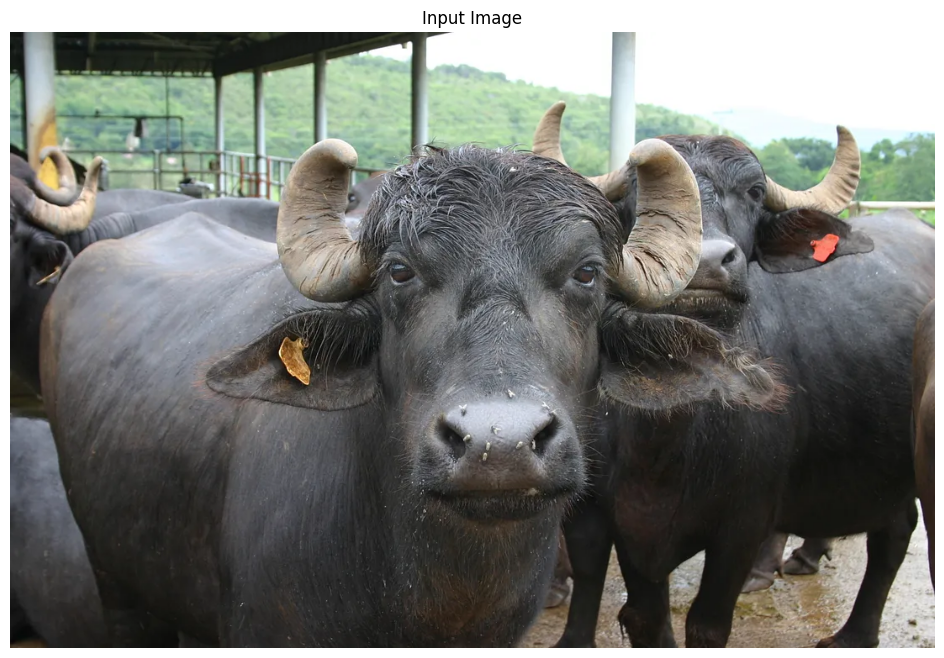


image 1/1 C:\Users\abhi2\Downloads\bu.jpg: 448x640 1 Buffalo, 174.4ms
Speed: 7.8ms preprocess, 174.4ms inference, 5.5ms postprocess per image at shape (1, 3, 448, 640)


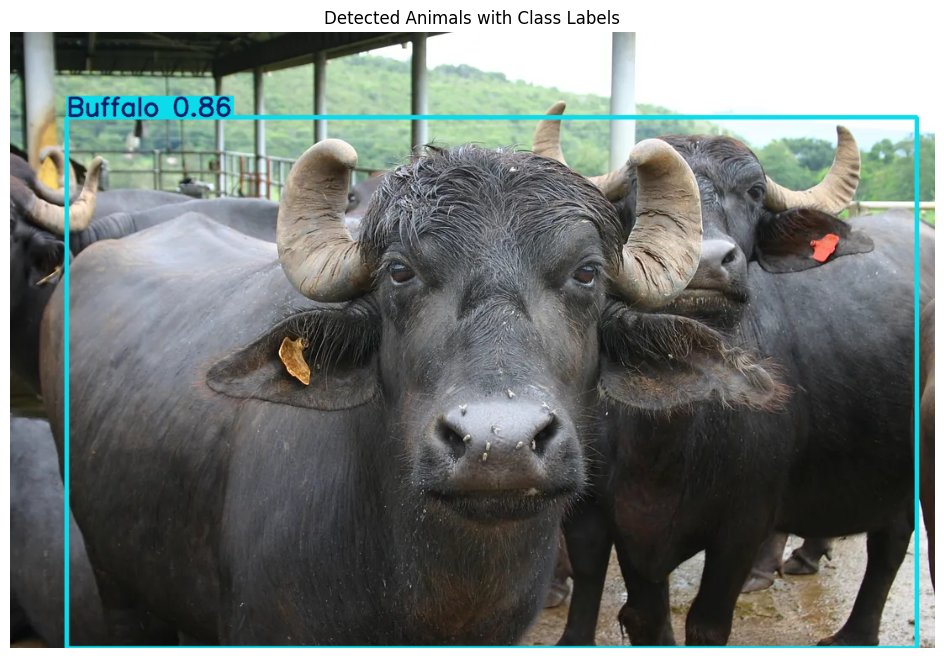

In [55]:
image_path = r"C:\Users\abhi2\Downloads\bu.jpg"
image = cv2.imread(image_path)
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.figure(figsize=(12, 8))
plt.imshow(image_rgb)
plt.axis('off')
plt.title("Input Image")
plt.show()
results = model(image_path)  
output_image = results[0].plot()
output_image_rgb = cv2.cvtColor(output_image, cv2.COLOR_BGR2RGB)
plt.figure(figsize=(12, 8))
plt.imshow(output_image_rgb)
plt.axis('off')
plt.title("Detected Animals with Class Labels")
plt.show()


In [ ]:
cap = cv2.VideoCapture(0)
if not cap.isOpened():
    print("❌ Cannot open webcam")
    exit()

engine = pyttsx3.init()

animal_detected_time = {}
alerted_animals = set()

print("Press 'q' to quit")

try:
    while True:
        ret, frame = cap.read()
        if not ret:
            print("❌ Failed to grab frame")
            break

        # Histogram Equalization for better contrast
        gray_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
        equalized_gray = cv2.equalizeHist(gray_frame)
        enhanced_frame = cv2.cvtColor(equalized_gray, cv2.COLOR_GRAY2BGR)

        # Run YOLOv8 detection on enhanced frame
        results = model(enhanced_frame)
        current_time = time.time()

        # Draw bounding boxes for detected animals
        for result in results:
            for box in result.boxes:
                cls_id = int(box.cls[0])
                label = model.names[cls_id]

                if label in animal_classes:
                    x1, y1, x2, y2 = map(int, box.xyxy[0])
                    conf = float(box.conf[0])

                    # Yellow bounding box (BGR: 0,255,255)
                    cv2.rectangle(enhanced_frame, (x1, y1), (x2, y2), (0, 255, 255), 2)
                    cv2.putText(enhanced_frame, f"{label} {conf:.2f}", (x1, y1 - 10),
                                cv2.FONT_HERSHEY_SIMPLEX, 0.9, (0, 255, 255), 2)

                    # TTS alert after 2 seconds of continuous detection
                    if label not in animal_detected_time:
                        animal_detected_time[label] = current_time
                    elif (current_time - animal_detected_time[label]) > 2 and label not in alerted_animals:
                        print(f"🔊 Animal detected: {label}")
                        engine.say(f"Animal detected: {label}")
                        engine.runAndWait()
                        alerted_animals.add(label)

        # Show the frame with bounding boxes in separate window
        cv2.imshow('Animal Detection Webcam', enhanced_frame)

        # Quit on 'q' key press
        if cv2.waitKey(1) & 0xFF == ord('q'):
            print("🛑 Quitting webcam...")
            break

except KeyboardInterrupt:
    print("🛑 Detection stopped by user")

finally:
    cap.release()
    engine.stop()
    cv2.destroyAllWindows()

Press 'q' to quit

0: 480x640 (no detections), 35.4ms
Speed: 4.4ms preprocess, 35.4ms inference, 3.6ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 (no detections), 34.0ms
Speed: 2.6ms preprocess, 34.0ms inference, 2.6ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 Cat, 1 Cow, 23.4ms
Speed: 3.6ms preprocess, 23.4ms inference, 3.6ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 Cat, 1 Cow, 20.7ms
Speed: 2.7ms preprocess, 20.7ms inference, 6.2ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 Cat, 22.2ms
Speed: 2.3ms preprocess, 22.2ms inference, 3.4ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 Cat, 21.9ms
Speed: 2.1ms preprocess, 21.9ms inference, 3.9ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 2 Cats, 27.3ms
Speed: 3.1ms preprocess, 27.3ms inference, 5.1ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 Cat, 23.2ms
Speed: 2.1ms preprocess, 23.2ms inference, 4.9ms postprocess

In [22]:
import cv2
from IPython.display import Video, display
def process_and_display_video_live(input_path):
    cap = cv2.VideoCapture(input_path)
    if not cap.isOpened():
        print(f"❌ Could not open video file: {input_path}")
        return
    
    try:
        while True:
            ret, frame = cap.read()
            if not ret:
                break
            
            # Run detection on the frame
            results = model(frame)

            # Draw yellow bounding boxes and labels
            for result in results:
                for box in result.boxes:
                    cls_id = int(box.cls[0])
                    label = model.names[cls_id]
                    if label in animal_classes:
                        x1, y1, x2, y2 = map(int, box.xyxy[0])
                        conf = float(box.conf[0])
                        cv2.rectangle(frame, (x1, y1), (x2, y2), (0, 255, 255), 2)
                        cv2.putText(frame, f"{label} {conf:.2f}", (x1, y1 - 10),
                                    cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0, 255, 255), 2)

            # Convert BGR to RGB for displaying
            frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
            pil_img = PIL.Image.fromarray(frame_rgb)

            # Display frame in notebook output
            with io.BytesIO() as buf:
                pil_img.save(buf, format='jpeg')
                clear_output(wait=True)
                display(Image(data=buf.getvalue()))

            time.sleep(0.03)  # ~30 FPS display speed
        
    except KeyboardInterrupt:
        print("🛑 Video processing stopped by user")

    cap.release()
    print("✅ Video processing finished")


video_file_path = r"C:\Users\abhi2\Downloads\Lion charges scared tourist in car.mp4"  # Change to your local video path
process_and_save_video(video_file_path)

Processing 225 frames...

0: 640x384 1 Lion, 124.0ms
Speed: 59.3ms preprocess, 124.0ms inference, 5.6ms postprocess per image at shape (1, 3, 640, 384)

0: 640x384 2 Lions, 77.6ms
Speed: 4.8ms preprocess, 77.6ms inference, 5.0ms postprocess per image at shape (1, 3, 640, 384)

0: 640x384 1 Lion, 29.8ms
Speed: 2.5ms preprocess, 29.8ms inference, 6.3ms postprocess per image at shape (1, 3, 640, 384)

0: 640x384 1 Lion, 28.5ms
Speed: 3.3ms preprocess, 28.5ms inference, 5.5ms postprocess per image at shape (1, 3, 640, 384)

0: 640x384 1 Lion, 27.1ms
Speed: 1.9ms preprocess, 27.1ms inference, 4.7ms postprocess per image at shape (1, 3, 640, 384)

0: 640x384 1 Lion, 28.1ms
Speed: 2.1ms preprocess, 28.1ms inference, 4.0ms postprocess per image at shape (1, 3, 640, 384)

0: 640x384 1 Lion, 23.4ms
Speed: 2.6ms preprocess, 23.4ms inference, 4.1ms postprocess per image at shape (1, 3, 640, 384)

0: 640x384 1 Lion, 25.2ms
Speed: 2.8ms preprocess, 25.2ms inference, 5.3ms postprocess per image at sh


0: 640x384 1 Lion, 36.1ms
Speed: 6.2ms preprocess, 36.1ms inference, 14.0ms postprocess per image at shape (1, 3, 640, 384)
Detection results: [ultralytics.engine.results.Results object with attributes:

boxes: ultralytics.engine.results.Boxes object
keypoints: None
masks: None
names: {0: 'Bear', 1: 'Buffalo', 2: 'Camel', 3: 'Cat', 4: 'Cow', 5: 'Deer', 6: 'Dog', 7: 'Donkey', 8: 'Elephant', 9: 'Leopard', 10: 'Lion', 11: 'Tiger'}
obb: None
orig_img: array([[[173, 148, 125],
        [167, 142, 119],
        [170, 145, 122],
        ...,
        [178, 133, 104],
        [166, 121,  92],
        [142,  97,  68]],

       [[174, 149, 126],
        [172, 147, 124],
        [171, 146, 123],
        ...,
        [184, 139, 110],
        [162, 117,  88],
        [144,  99,  70]],

       [[178, 153, 130],
        [182, 157, 134],
        [172, 147, 124],
        ...,
        [194, 149, 120],
        [151, 106,  77],
        [145, 100,  71]],

       ...,

       [[201, 171, 165],
        [201, 

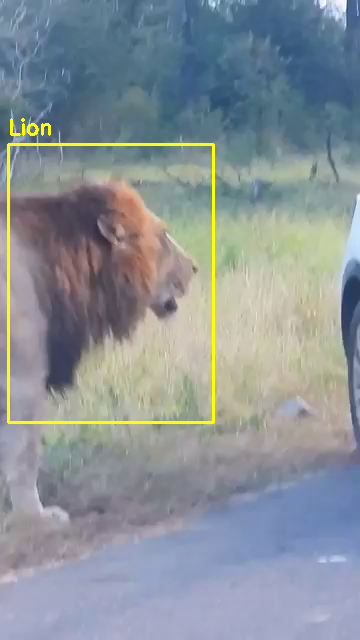

In [26]:
# Read one frame from your video file
cap = cv2.VideoCapture(video_file_path)
ret, frame = cap.read()
cap.release()

if not ret:
    print("❌ Failed to read frame")
else:
    # Run your model on this frame
    results = model(frame)

    # Print results to debug
    print("Detection results:", results)

    # Optionally draw detections on the frame
    for result in results:
        for box in result.boxes:
            cls_id = int(box.cls[0])
            label = model.names[cls_id]
            print(f"Detected: {label}")

            x1, y1, x2, y2 = map(int, box.xyxy[0])
            cv2.rectangle(frame, (x1, y1), (x2, y2), (0, 255, 255), 2)
            cv2.putText(frame, f"{label}", (x1, y1 - 10),
                        cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0, 255, 255), 2)

    # Display the annotated frame
    from IPython.display import display
    import PIL.Image
    pil_img = PIL.Image.fromarray(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))
    display(pil_img)


In [68]:
import cv2

# Make sure you have your model and animal_classes defined before running this

def display_video_in_window(input_path):
    cap = cv2.VideoCapture(input_path)
    if not cap.isOpened():
        print(f"❌ Could not open video file: {input_path}")
        return

    while True:
        ret, frame = cap.read()
        if not ret:
            print("End of video or cannot read frame.")
            break

        # Run model detection on the frame
        results = model(frame)

        # Draw bounding boxes and labels in yellow
        for result in results:
            for box in result.boxes:
                cls_id = int(box.cls[0])
                label = model.names[cls_id]
                if label in animal_classes:
                    x1, y1, x2, y2 = map(int, box.xyxy[0])
                    conf = float(box.conf[0])
                    cv2.rectangle(frame, (x1, y1), (x2, y2), (0, 255, 255), 2)  # Yellow box
                    cv2.putText(frame, f"{label} {conf:.2f}", (x1, y1 - 10),
                                cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0, 255, 255), 2)

        # Show frame in a new window
        cv2.imshow('YOLOv8 Detection', frame)

        # Press 'q' key to quit early
        if cv2.waitKey(1) & 0xFF == ord('q'):
            print("Quitting...")
            break

    cap.release()
    cv2.destroyAllWindows()

# Example usage - change to your local video path
video_file_path = r"C:\Users\abhi2\Downloads\Elephant  short #video #shorts #funny #funnyanimal #elephant #animals #animalllover#youtubeshorts.mp4"
display_video_in_window(video_file_path)



0: 640x384 1 Elephant, 33.3ms
Speed: 4.4ms preprocess, 33.3ms inference, 5.7ms postprocess per image at shape (1, 3, 640, 384)

0: 640x384 1 Elephant, 45.8ms
Speed: 5.3ms preprocess, 45.8ms inference, 14.1ms postprocess per image at shape (1, 3, 640, 384)

0: 640x384 1 Elephant, 64.1ms
Speed: 5.1ms preprocess, 64.1ms inference, 6.6ms postprocess per image at shape (1, 3, 640, 384)

0: 640x384 1 Elephant, 21.2ms
Speed: 1.8ms preprocess, 21.2ms inference, 4.8ms postprocess per image at shape (1, 3, 640, 384)

0: 640x384 (no detections), 24.5ms
Speed: 2.1ms preprocess, 24.5ms inference, 2.7ms postprocess per image at shape (1, 3, 640, 384)

0: 640x384 1 Elephant, 20.6ms
Speed: 2.5ms preprocess, 20.6ms inference, 4.9ms postprocess per image at shape (1, 3, 640, 384)

0: 640x384 1 Elephant, 23.4ms
Speed: 2.1ms preprocess, 23.4ms inference, 4.0ms postprocess per image at shape (1, 3, 640, 384)

0: 640x384 1 Elephant, 40.7ms
Speed: 2.2ms preprocess, 40.7ms inference, 4.5ms postprocess per im

In [64]:
import cv2

# Make sure you have your model and animal_classes defined before running this

def display_video_in_window(input_path):
    cap = cv2.VideoCapture(input_path)
    if not cap.isOpened():
        print(f"❌ Could not open video file: {input_path}")
        return

    while True:
        ret, frame = cap.read()
        if not ret:
            print("End of video or cannot read frame.")
            break

        # Run model detection on the frame
        results = model(frame)

        # Draw bounding boxes and labels in yellow
        for result in results:
            for box in result.boxes:
                cls_id = int(box.cls[0])
                label = model.names[cls_id]
                if label in animal_classes:
                    x1, y1, x2, y2 = map(int, box.xyxy[0])
                    conf = float(box.conf[0])
                    cv2.rectangle(frame, (x1, y1), (x2, y2), (0, 255, 255), 2)  # Yellow box
                    cv2.putText(frame, f"{label} {conf:.2f}", (x1, y1 - 10),
                                cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0, 255, 255), 2)

        # Show frame in a new window
        cv2.imshow('YOLOv8 Detection', frame)

        # Press 'q' key to quit early
        if cv2.waitKey(1) & 0xFF == ord('q'):
            print("Quitting...")
            break

    cap.release()
    cv2.destroyAllWindows()

# Example usage - change to your local video path
video_file_path = r"C:\Users\abhi2\Downloads\Lion on Road # #shortsyoutube.mp4"
display_video_in_window(video_file_path)




0: 640x384 1 Lion, 92.2ms
Speed: 4.9ms preprocess, 92.2ms inference, 15.8ms postprocess per image at shape (1, 3, 640, 384)

0: 640x384 1 Lion, 61.4ms
Speed: 6.0ms preprocess, 61.4ms inference, 10.3ms postprocess per image at shape (1, 3, 640, 384)

0: 640x384 1 Lion, 47.7ms
Speed: 4.1ms preprocess, 47.7ms inference, 6.7ms postprocess per image at shape (1, 3, 640, 384)

0: 640x384 1 Lion, 53.7ms
Speed: 5.4ms preprocess, 53.7ms inference, 9.3ms postprocess per image at shape (1, 3, 640, 384)

0: 640x384 1 Lion, 22.5ms
Speed: 4.8ms preprocess, 22.5ms inference, 4.6ms postprocess per image at shape (1, 3, 640, 384)

0: 640x384 1 Lion, 22.2ms
Speed: 2.5ms preprocess, 22.2ms inference, 4.3ms postprocess per image at shape (1, 3, 640, 384)

0: 640x384 1 Lion, 21.5ms
Speed: 2.3ms preprocess, 21.5ms inference, 4.2ms postprocess per image at shape (1, 3, 640, 384)

0: 640x384 1 Lion, 23.0ms
Speed: 1.9ms preprocess, 23.0ms inference, 4.6ms postprocess per image at shape (1, 3, 640, 384)

0: 64

In [62]:
import cv2

# Make sure you have your model and animal_classes defined before running this

def display_video_in_window(input_path):
    cap = cv2.VideoCapture(input_path)
    if not cap.isOpened():
        print(f"❌ Could not open video file: {input_path}")
        return

    while True:
        ret, frame = cap.read()
        if not ret:
            print("End of video or cannot read frame.")
            break

        # Run model detection on the frame
        results = model(frame)

        # Draw bounding boxes and labels in yellow
        for result in results:
            for box in result.boxes:
                cls_id = int(box.cls[0])
                label = model.names[cls_id]
                if label in animal_classes:
                    x1, y1, x2, y2 = map(int, box.xyxy[0])
                    conf = float(box.conf[0])
                    cv2.rectangle(frame, (x1, y1), (x2, y2), (0, 255, 255), 2)  # Yellow box
                    cv2.putText(frame, f"{label} {conf:.2f}", (x1, y1 - 10),
                                cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0, 255, 255), 2)

        # Show frame in a new window
        cv2.imshow('YOLOv8 Detection', frame)

        # Press 'q' key to quit early
        if cv2.waitKey(1) & 0xFF == ord('q'):
            print("Quitting...")
            break

    cap.release()
    cv2.destroyAllWindows()

# Example usage - change to your local video path
video_file_path = r"C:\Users\abhi2\Downloads\Donkey on the road Animal Nature.mp4"
display_video_in_window(video_file_path)




0: 640x384 1 Donkey, 40.0ms
Speed: 301.4ms preprocess, 40.0ms inference, 8.7ms postprocess per image at shape (1, 3, 640, 384)

0: 640x384 (no detections), 45.8ms
Speed: 10.4ms preprocess, 45.8ms inference, 4.6ms postprocess per image at shape (1, 3, 640, 384)

0: 640x384 (no detections), 51.2ms
Speed: 5.4ms preprocess, 51.2ms inference, 5.1ms postprocess per image at shape (1, 3, 640, 384)

0: 640x384 1 Deer, 26.6ms
Speed: 3.5ms preprocess, 26.6ms inference, 4.8ms postprocess per image at shape (1, 3, 640, 384)

0: 640x384 1 Deer, 23.5ms
Speed: 2.2ms preprocess, 23.5ms inference, 6.2ms postprocess per image at shape (1, 3, 640, 384)

0: 640x384 (no detections), 23.3ms
Speed: 3.1ms preprocess, 23.3ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 384)

0: 640x384 1 Dog, 21.4ms
Speed: 2.9ms preprocess, 21.4ms inference, 5.4ms postprocess per image at shape (1, 3, 640, 384)

0: 640x384 1 Deer, 22.1ms
Speed: 2.4ms preprocess, 22.1ms inference, 4.5ms postprocess per image at 